##  Boston 주택 가격 예측 모델

In [1]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

2025-06-16 21:52:53.861480: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기를 확인합니다.
print(len(train_data))
print(len(test_data))

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
404
102


In [4]:
# 문제 1-1: 데이터셋의 전처리를 위해 표준화 작업을 수행합니다.
# 표준화는 각 특성(feature)의 평균을 0으로, 표준편차를 1로 만드는 작업입니다.
# 먼저 입력 데이터의 각 특성의 평균을 뺍니다.
train_mean = train_data.mean(axis=0)
train_centered = train_data - train_mean

# 평균을 뺀 입력 데이터에서 표준편차를 나눕니다.
# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만듭니다.
train_std = train_data.std(axis=0)
train_normalized = train_centered / train_std

# 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나눕니다.
test_centered = test_data - train_mean
test_normalized = test_centered / train_std

/Users/hb/miniconda3/envs/moduenv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - loss: 570.7450 - mae: 21.9582 - val_loss: 606.4713 - val_mae: 22.8541
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 532.5291 - mae: 21.0129 - val_loss: 553.7895 - val_mae: 21.6955
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 477.8949 - mae: 19.8424 - val_loss: 488.5993 - val_mae: 20.1879
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 430.0565 - mae: 18.4623 - val_loss: 407.5420 - val_mae: 18.2071
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 345.5568 - mae: 16.3229 - val_loss: 310.8439 - val_mae: 15.5415
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 238.1641 - mae: 13.2927 - val_loss: 209.6553 - val_mae: 12.3458
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 156.1575 - mae: 10.6407 - val_loss: 126.7950 - val_mae: 9.0092
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 82.2391 - mae: 7.4834 - val_loss: 81.2945 - val_mae: 7.0025
Epoch 9/100
11/11 ━

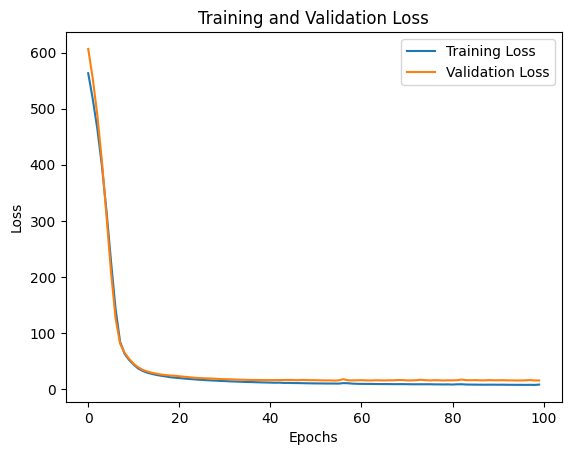

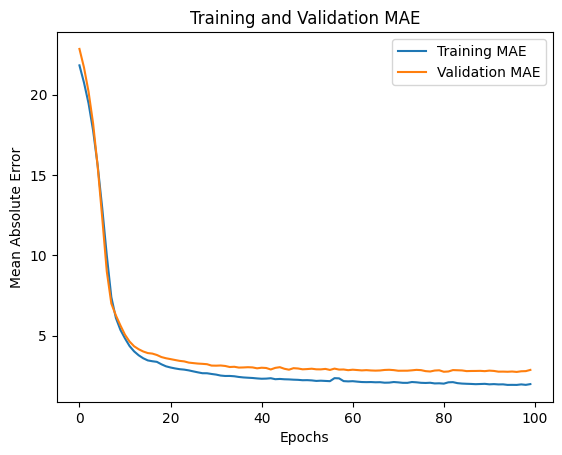

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 17.9350 - mae: 2.8610 
Test Loss: 23.21807289123535
Test MAE: 3.0773003101348877
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[[ 6.131442 ]
 [17.776152 ]
 [20.846004 ]
 [30.143734 ]
 [25.533792 ]
 [18.137766 ]
 [27.011206 ]
 [21.916079 ]
 [18.147951 ]
 [20.760126 ]
 [17.953718 ]
 [16.430893 ]
 [14.782531 ]
 [42.399784 ]
 [18.52767  ]
 [19.590162 ]
 [26.304075 ]
 [21.46069  ]
 [17.744314 ]
 [35.872295 ]
 [10.754088 ]
 [14.128154 ]
 [20.030624 ]
 [14.316345 ]
 [20.55816  ]
 [23.926619 ]
 [30.010561 ]
 [29.24183  ]
 [ 9.050891 ]
 [21.437693 ]
 [18.561113 ]
 [12.614506 ]
 [33.96786  ]
 [24.95706  ]
 [17.118221 ]
 [ 6.799908 ]
 [15.324977 ]
 [17.947004 ]
 [18.971464 ]
 [26.406786 ]
 [30.63472  ]
 [28.452623 ]
 [13.460601 ]
 [40.23393  ]
 [31.023321 ]
 [23.757662 ]
 [26.165522 ]
 [15.410155 ]
 [22.92129  ]
 [21.421392 ]
 [35.45403  ]
 [19.385626 ]
 [11.160264 ]
 [15.572932 ]
 [33.765118 ]
 [28.080448 ]
 [11.828938 ]
 [47.37757  ]
 [35.412216 ]
 [23.86975

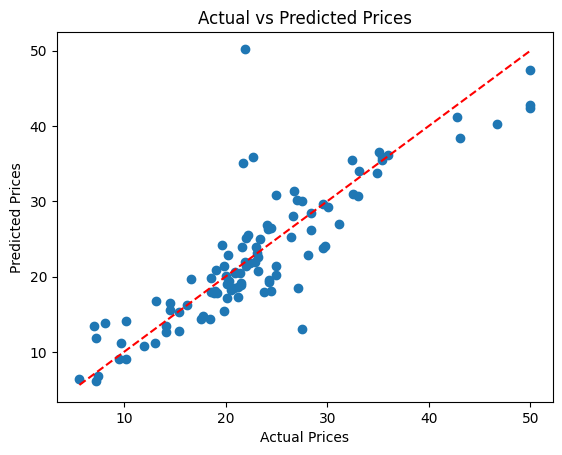

In [5]:
# 문제 1-2: 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일합니다.
# input_shape은 (train_data.shape[1], )으로 구성합니다.
# 회귀(예측)을 위한 모델이므로 loss를 mse, metrics를 mae로 사용합니다.
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))  # 출력층은 1개의 노드로 구성
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
# 문제 1-3: 모델을 학습합니다.
history = model.fit(train_normalized, train_labels, epochs=100, batch_size=32, validation_split=0.2)
# 문제 1-4: 학습 과정에서의 손실과 평균 절대 오차를 시각화합니다.
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()
# 문제 1-5: 테스트 데이터셋에 대한 모델의 성능을 평가합니다.
test_loss, test_mae = model.evaluate(test_normalized, test_labels)
print(f'Test Loss: {test_loss}')
print(f'Test MAE: {test_mae}')
# 문제 1-6: 테스트 데이터셋에 대한 예측을 수행합니다.
predictions = model.predict(test_normalized)
# 예측 결과를 출력합니다.
print(predictions)
# 문제 1-7: 예측 결과와 실제 테스트 레이블을 비교합니다.
import numpy as np
comparison = np.column_stack((test_labels, predictions))
print("Actual vs Predicted:")
print(comparison[:10])  # 상위 10개 비교 결과 출력
# 문제 1-8: 예측 결과를 시각화합니다.
plt.scatter(test_labels, predictions)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.plot([min(test_labels), max(test_labels)], [min(test_labels), max(test_labels)], 'r--')  # y=x 선
plt.show()
# 문제 1-9: 모델을 저장합니다.
model.save('boston_housing_model.h5')

## Reuters 딥러닝 모델

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from keras.datasets import reuters

In [11]:
# 문제 2-1: reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리합니다.
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)
# 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리합니다.
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size=0.25, random_state=42)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇 개인지 출력합니다.
print(len(train_data))
print(len(val_data))
print(len(test_data))
print(len(set(train_labels)))

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
6736
2246
2246
46


In [12]:
# 문제 2-2: 텍스트 데이터의 전처리를 위해서 각 데이터셋마다 원-핫 인코딩을 수행합니다.
def one_hot_encoding(data, dim=10000):
    # 각 문서의 단어 인덱스를 원-핫 벡터로 변환합니다.
    results = np.zeros((len(data), dim))
    for i, sequence in enumerate(data):
        results[i, sequence] = 1.0
    return results

x_train = one_hot_encoding(train_data)
x_val = one_hot_encoding(val_data)
x_test = one_hot_encoding(test_data)

# 레이블 데이터들은 범주형 형태로 to_categorical() 함수를 사용해 변환합니다.
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_val = to_categorical(val_labels)
y_test = to_categorical(test_labels)


In [13]:
# 문제 2-3: 빠른 학습과 과대적합을 방지하기 위해 BatchNormalization과 Dropout을 적용한 딥러닝 모델을 구성합니다.
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))  # Dropout 레이어 추가
model.add(layers.Dense(64, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))  # Dropout 레이어 추가
model.add(layers.Dense(46, activation='softmax'))  # 출력층은 46개의 클래스
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/Users/hb/miniconda3/envs/moduenv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │       640,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 46)             │         2,990 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 647,726 (2.47 MB)

 Trainable params: 647,470 (2.47 MB)

 Non-trainable params: 256 (1.00 KB)

In [15]:
# 문제 2-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
checkpoint_cb = callbacks.ModelCheckpoint("reuters_model.h5", save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=5, restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val), 
                    callbacks=[checkpoint_cb, early_stopping_cb])


Epoch 1/20
12/14 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.0599 - loss: 4.4292

14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - accuracy: 0.0734 - loss: 4.3337 - val_accuracy: 0.5022 - val_loss: 3.6453
Epoch 2/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3715 - loss: 2.8753

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.3749 - loss: 2.8648 - val_accuracy: 0.6033 - val_loss: 3.3575
Epoch 3/20
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5610 - loss: 2.1735

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.5631 - loss: 2.1606 - val_accuracy: 0.6558 - val_loss: 3.0442
Epoch 4/20
12/14 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6374 - loss: 1.7967

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.6393 - loss: 1.7814 - val_accuracy: 0.6870 - val_loss: 2.7504
Epoch 5/20
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6881 - loss: 1.4904

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.6884 - loss: 1.4900 - val_accuracy: 0.7070 - val_loss: 2.5135
Epoch 6/20
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7141 - loss: 1.3421

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.7147 - loss: 1.3392 - val_accuracy: 0.7128 - val_loss: 2.3180
Epoch 7/20
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7415 - loss: 1.2216

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.7417 - loss: 1.2188 - val_accuracy: 0.7133 - val_loss: 2.1350
Epoch 8/20
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7556 - loss: 1.1005

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.7563 - loss: 1.0993 - val_accuracy: 0.7213 - val_loss: 1.9949
Epoch 9/20
12/14 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7837 - loss: 0.9869

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.7830 - loss: 0.9862 - val_accuracy: 0.7213 - val_loss: 1.8714
Epoch 10/20
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7922 - loss: 0.9138

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.7918 - loss: 0.9149 - val_accuracy: 0.7244 - val_loss: 1.7405
Epoch 11/20
12/14 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8173 - loss: 0.8181

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.8145 - loss: 0.8282 - val_accuracy: 0.7262 - val_loss: 1.6323
Epoch 12/20
12/14 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8116 - loss: 0.8275

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.8119 - loss: 0.8245 - val_accuracy: 0.7342 - val_loss: 1.5244
Epoch 13/20
11/14 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8218 - loss: 0.7901

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.8225 - loss: 0.7821 - val_accuracy: 0.7244 - val_loss: 1.4457
Epoch 14/20
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.8295 - loss: 0.7266

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.8299 - loss: 0.7247 - val_accuracy: 0.7337 - val_loss: 1.3700
Epoch 15/20
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8332 - loss: 0.6913

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.8337 - loss: 0.6905 - val_accuracy: 0.7444 - val_loss: 1.3018
Epoch 16/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.8471 - loss: 0.6245

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.8471 - loss: 0.6252 - val_accuracy: 0.7529 - val_loss: 1.2403
Epoch 17/20
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8490 - loss: 0.6352

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.8493 - loss: 0.6335 - val_accuracy: 0.7538 - val_loss: 1.1943
Epoch 18/20
12/14 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.8644 - loss: 0.5792

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.8640 - loss: 0.5806 - val_accuracy: 0.7631 - val_loss: 1.1450
Epoch 19/20
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8740 - loss: 0.5332

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.8733 - loss: 0.5361 - val_accuracy: 0.7645 - val_loss: 1.1131
Epoch 20/20
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8774 - loss: 0.5312

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.8769 - loss: 0.5322 - val_accuracy: 0.7694 - val_loss: 1.0886


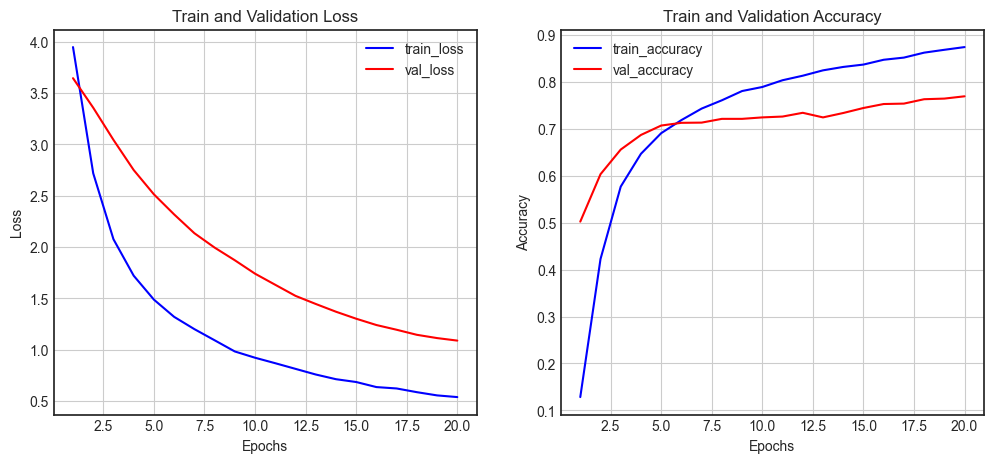

In [19]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-v0_8-white')  # or use 'seaborn' if this does not work

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [20]:
# 문제 2-5: 테스트 데이터셋을 이용해 모델을 평가합니다.
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')


71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7570 - loss: 1.0922
Test Loss: 1.1149004697799683
Test Accuracy: 0.7560107111930847


## CIFAR10 딥러닝 모델

In [21]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

In [22]:
# 문제 3-1: cifar10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다.
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()
# 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다.
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.2, random_state=42)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.
print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 40s 0us/step
전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


In [23]:
# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer', 
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

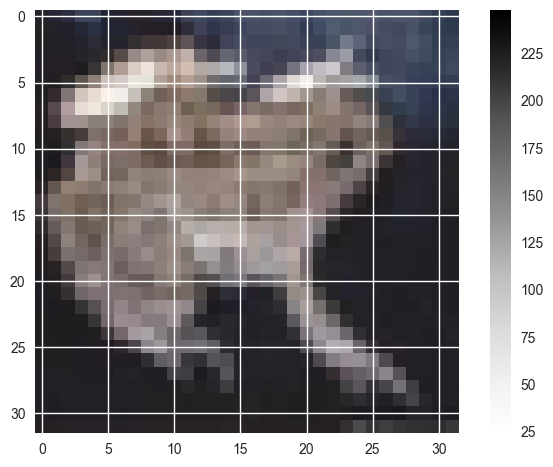

In [27]:
# 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화합니다.
if 'seaborn-v0_8' in plt.style.available:
	plt.style.use('seaborn-v0_8')
else:
	plt.style.use('classic')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [28]:
# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력합니다.
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [29]:
# 문제 3-2: 훈련, 검증, 테스트 데이터의 형태(shape)을 32 * 32 * 3 = 3072로 변형합니다.
x_train = x_train.reshape((x_train.shape[0], 32 * 32 * 3))
x_val = x_val.reshape((x_val.shape[0], 32 * 32 * 3))
x_test = x_test.reshape((x_test.shape[0], 32 * 32 * 3))
# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력합니다.
print("변형된 데이터 형태:")    
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

변형된 데이터 형태:
(40000, 3072)
(10000, 3072)
(10000, 3072)


In [30]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

In [ ]:
# 문제 3-3: BatchNormalization과 Dropout을 적용하여 빠른 학습과 과대적합을 방지하고,
# 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(32 * 32 * 3,)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))  # Dropout 레이어 추가
model.add(layers.Dense(512, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))  # Dropout 레이어 추가
model.add(layers.Dense(10, activation='softmax'))  # 출력층은 10개의 클래스

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/Users/hb/miniconda3/envs/moduenv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,845,258 (7.04 MB)

 Trainable params: 1,843,210 (7.03 MB)

 Non-trainable params: 2,048 (8.00 KB)

In [34]:
%pip install pydot
utils.plot_model(model, show_shapes=True)

Note: you may need to restart the kernel to use updated packages.
You must install pydot (`pip install pydot`) for `plot_model` to work.


In [35]:
# 문제 3-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
checkpoint_cb = callbacks.ModelCheckpoint("cifar10_model.h5", save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=5, restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=20, batch_size=512, 
                    validation_data=(x_val, y_val), 
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.2317 - loss: 2.6982

79/79 ━━━━━━━━━━━━━━━━━━━━ 8s 60ms/step - accuracy: 0.2321 - loss: 2.6951 - val_accuracy: 0.2151 - val_loss: 2.6192
Epoch 2/20
78/79 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.3112 - loss: 2.0592

79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - accuracy: 0.3115 - loss: 2.0580 - val_accuracy: 0.3899 - val_loss: 1.7268
Epoch 3/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.3500 - loss: 1.8796 - val_accuracy: 0.3254 - val_loss: 1.8902
Epoch 4/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.3754 - loss: 1.7723 - val_accuracy: 0.3522 - val_loss: 1.7888
Epoch 5/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - accuracy: 0.3959 - loss: 1.7073 - val_accuracy: 0.3777 - val_loss: 1.7624
Epoch 6/20
78/79 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.4145 - loss: 1.6492

79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.4144 - loss: 1.6494 - val_accuracy: 0.3903 - val_loss: 1.7106
Epoch 7/20
78/79 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.4181 - loss: 1.6359

79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - accuracy: 0.4180 - loss: 1.6360 - val_accuracy: 0.4107 - val_loss: 1.6437
Epoch 8/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4258 - loss: 1.6166

79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.4258 - loss: 1.6165 - val_accuracy: 0.4224 - val_loss: 1.6012
Epoch 9/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.4254 - loss: 1.6032

79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.4254 - loss: 1.6031 - val_accuracy: 0.4331 - val_loss: 1.5722
Epoch 10/20
78/79 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.4372 - loss: 1.5851

79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.4373 - loss: 1.5850 - val_accuracy: 0.4336 - val_loss: 1.5573
Epoch 11/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.4415 - loss: 1.5691 - val_accuracy: 0.4337 - val_loss: 1.6219
Epoch 12/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.4407 - loss: 1.5762 - val_accuracy: 0.4269 - val_loss: 1.5770
Epoch 13/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.4455 - loss: 1.5497 - val_accuracy: 0.4207 - val_loss: 1.5925
Epoch 14/20
78/79 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.4451 - loss: 1.5584

79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.4452 - loss: 1.5583 - val_accuracy: 0.4546 - val_loss: 1.5200
Epoch 15/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.4441 - loss: 1.5447 - val_accuracy: 0.4378 - val_loss: 1.5653
Epoch 16/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.4565 - loss: 1.5422 - val_accuracy: 0.4360 - val_loss: 1.5813
Epoch 17/20
78/79 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.4550 - loss: 1.5332

79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.4550 - loss: 1.5332 - val_accuracy: 0.4550 - val_loss: 1.5131
Epoch 18/20
78/79 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4587 - loss: 1.5174

79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.4586 - loss: 1.5177 - val_accuracy: 0.4530 - val_loss: 1.5055
Epoch 19/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - accuracy: 0.4625 - loss: 1.5166 - val_accuracy: 0.4299 - val_loss: 1.5882
Epoch 20/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.4591 - loss: 1.5291 - val_accuracy: 0.4405 - val_loss: 1.5699


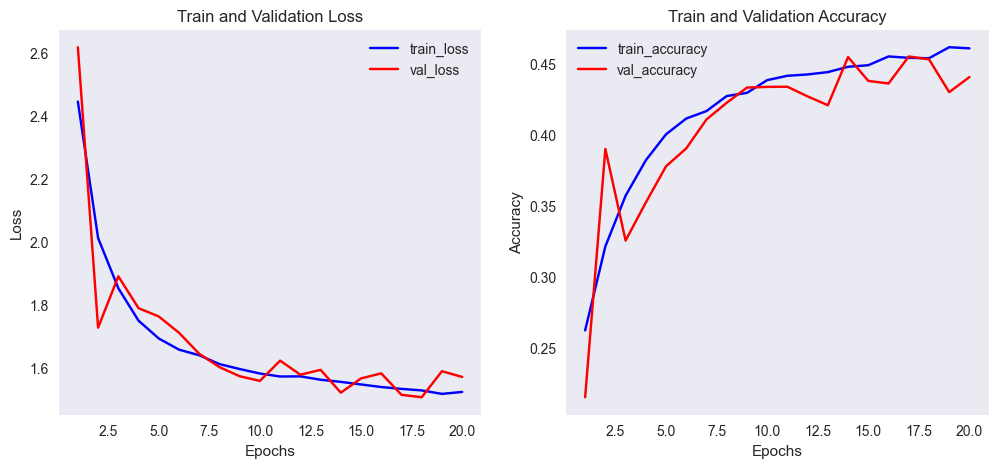

In [36]:
# 문제 3-5: 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()
plt.show()

In [37]:
# 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4671 - loss: 1.4754


[1.485068917274475, 0.46459999680519104]